# Analysis 1- Shreyas Bhatt

## Milestone 2

#### Task 3 : Define and refine your research questions

**To what extent does the revenue of a company impact it's growth rate and other company dynamics?**

It is quite common for many companies to experience an unprecedented growth during their early stages of operation. Although, it is also apparant that this growth is temporary and that once a company gains enough traction, growth generally slows down. I wish to understand and quantify the nature of this relationship by comparing the revenue of the company with CAGR (compounded growth). I also wish to understand what sorts of metrics seem to be helpful for large companies to maintain growth- from employee count to where the company is based and so on. 

My dataset features revenue entries for 2020 and for 2017, and moving on I may have to either combine this data in someway or observe the relationships of both of these revenues. Currently I feel that it may incorporate some inconsistency if I merge them, as well as looking at 2020 solely would likely not be a fair representation of the companies given the economic climate.

#### Task 2 : Load Dataset

In [ ]:
# loading dataframe
import pandas as pd
pd.read_csv("../data/raw/FT1000.csv")

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,peopleForecast,No,No,Germany,Technology,36.59,2086411,818658,45,15,2014
996,997,Digitalpa,No,No,Italy,Management Consulting,36.59,1731340,679440,12,41,2014
997,998,Faktenkontor,No,No,Germany,Advertising,36.59,30967000,12153143,150,100,2003
998,999,CLAREO,Yes,Yes,France,Retail,36.58,18854708,7399729,53,13,2012


## Milestone 3 
### Task 1: Exploratory Data Analysis (EDA)

In [ ]:
# Importing libraries for analysis and visualization (Pandas already imported)
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Trying to understand the basic details of data
df = pd.read_csv("../data/raw/FT1000.csv")
df.info()
print('Shape of data is', df.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   Ranked2021     1000 non-null   object 
 3   Ranked2020     1000 non-null   object 
 4   Country        1000 non-null   object 
 5   Sector         1000 non-null   object 
 6   CAGR           1000 non-null   float64
 7   Revenue2020    1000 non-null   int64  
 8   Revenue2017    1000 non-null   int64  
 9   Employees2020  1000 non-null   int64  
 10  Employees2017  1000 non-null   int64  
 11  FoundingYear   1000 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.9+ KB
Shape of data is (1000, 12)


In [ ]:
print('Unique Variables Below')
df.nunique(axis=0)

Unique Variables Below


Rank             1000
Name             1000
Ranked2021          2
Ranked2020          2
Country            30
Sector             39
CAGR              931
Revenue2020       999
Revenue2017       999
Employees2020     225
Employees2017     122
FoundingYear       42
dtype: int64

In [ ]:
df.describe()

,Rank,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,78.881950,2.034009e+07,4.005901e+06,79.948000,26.480000,2011.275000
std,288.819436,52.471399,7.771805e+07,9.207763e+06,161.448155,63.526161,7.665516
min,1.000000,36.550000,1.507867e+06,1.007110e+05,1.000000,0.000000,1898.000000
25%,250.750000,46.582500,3.186724e+06,6.283870e+05,14.000000,4.000000,2010.000000
50%,500.500000,61.105000,6.361154e+06,1.271956e+06,30.000000,10.000000,2013.000000
75%,750.250000,93.522500,1.662410e+07,3.549436e+06,70.000000,23.000000,2015.000000
max,1000.000000,477.430000,2.120072e+09,1.453982e+08,1798.000000,767.000000,2017.000000


#### Observations (1/2)
From the above commands, there are a few important details I have noticed. 

- Firstly, some of the figures are a little strange. The lowest number of employees for one of the top 1000 european companies in 2020 was 1 person. This seems quite unplausible and even if it truly were the case that such a company did have 1 employee in 2020, I do not think it makes much sense to compare this company with other companies because of how different it must be. Some companies also did not exist in 2017 with 0 employees. Therefore I will consider an employee count filter.

- I should rename some rows to be more clear and with units. 

- The integer data types are fine but some data types could be better expressed as categories or strings etc.

- Elsewise I think that the data looks reasonable at a first glance, no non-null count and the shape of the data is accurate.

Now data may be illustrated.

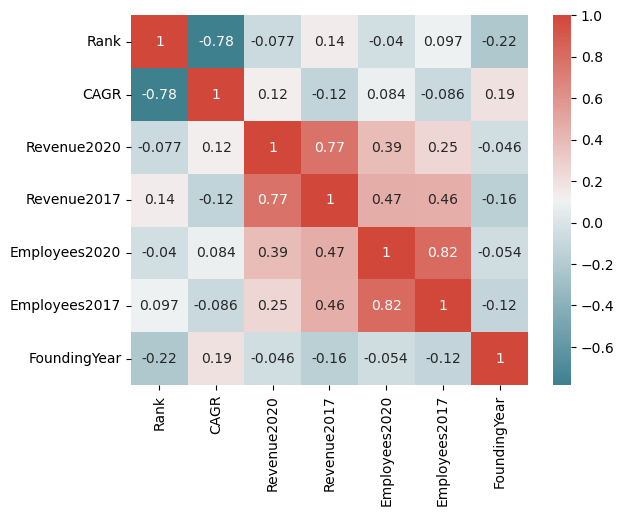

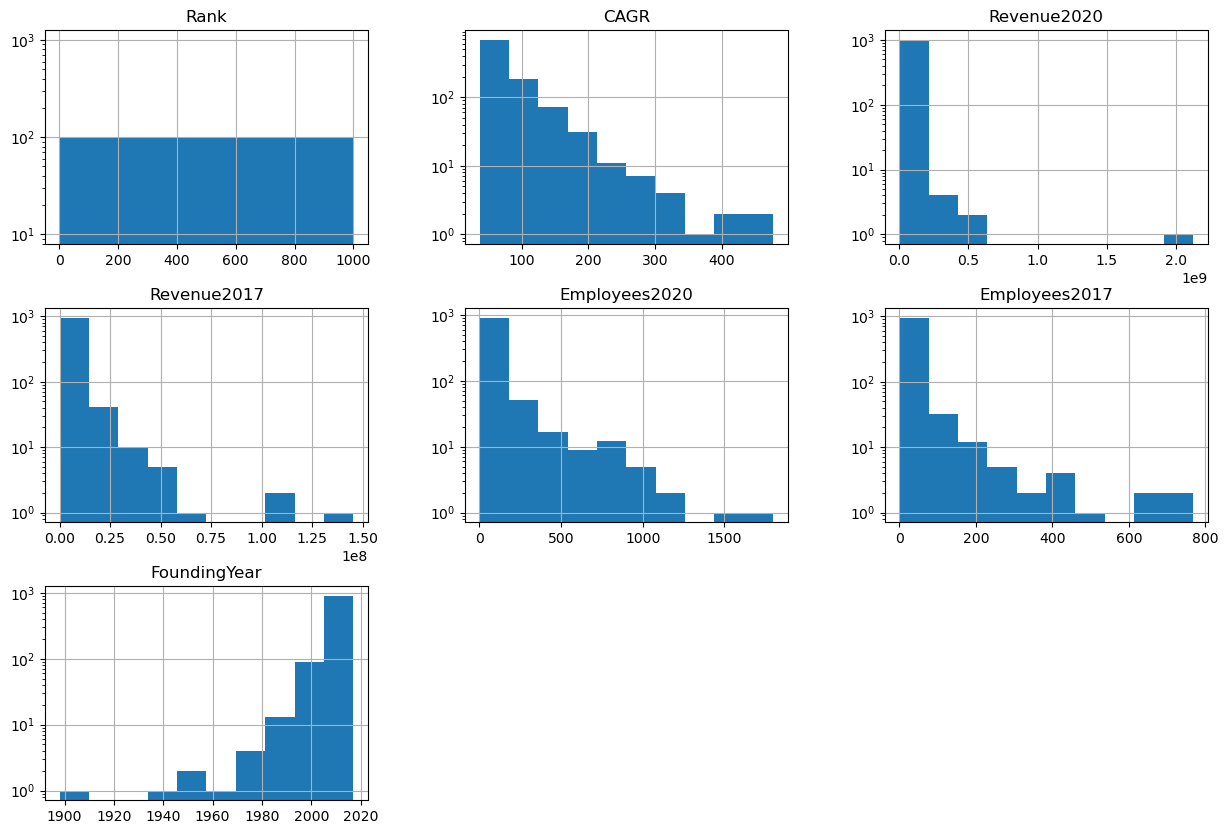

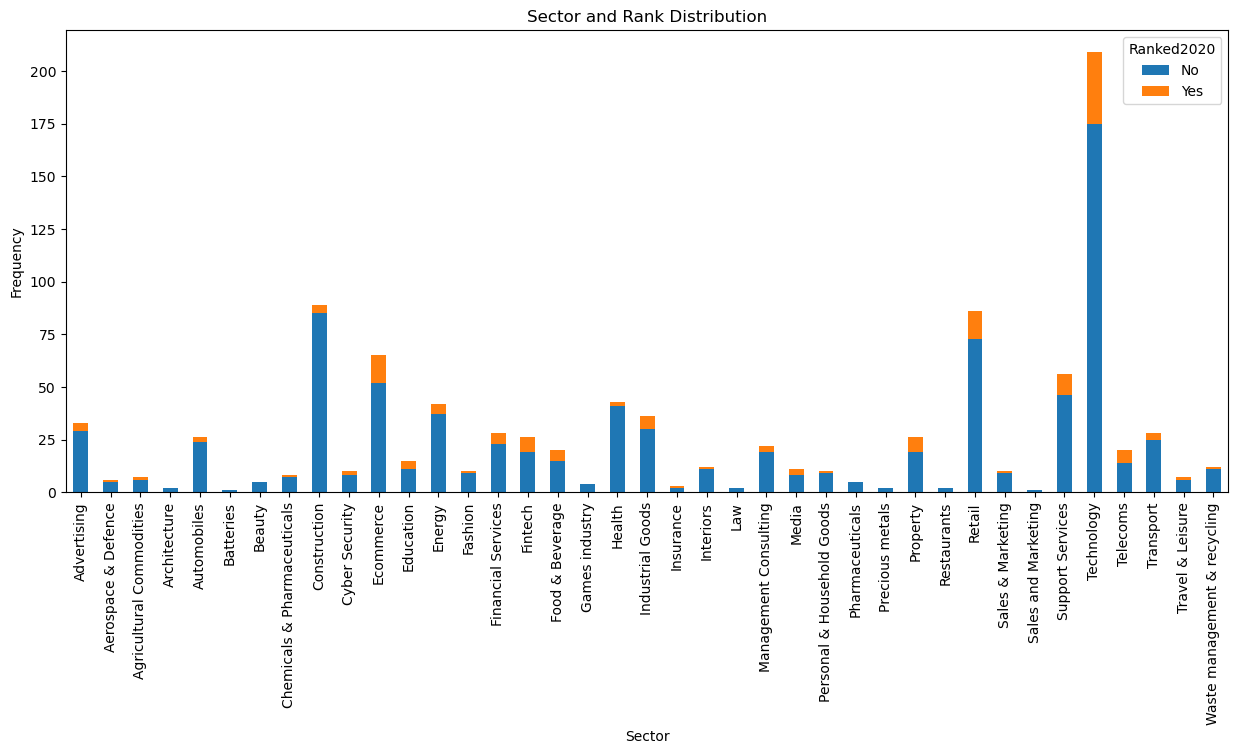

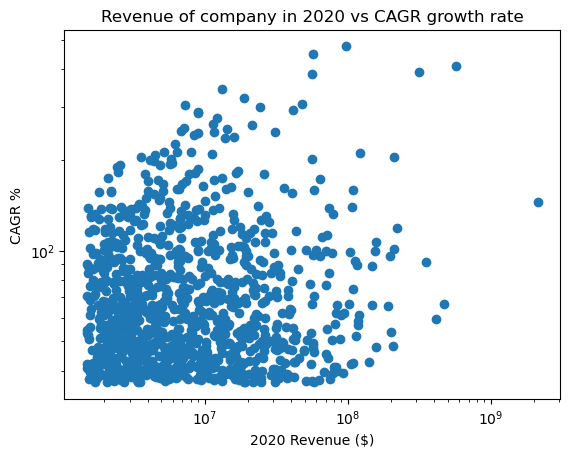

In [ ]:
#Illustrating Data

# 1) HeatPlot
corr = df.corr(numeric_only = [True])
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(215, 15, as_cmap=True))

# 2) Histogram of everything
hist = df.hist(bins=10,figsize =(15,10), log=True)

# 3) Bar Graph illustrating ranked status in 2020 and sector
grouped_data = df.groupby(['Sector', 'Ranked2020']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Sector and Rank Distribution')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# 4) Graph showing relationship betwen revenue of company and CAGR growth rate
plt.scatter(df['Revenue2020'], df['CAGR'])
# Set the x-axis label and y-axis label
plt.title('Revenue of company in 2020 vs CAGR growth rate')
plt.xlabel('2020 Revenue ($)')
plt.ylabel('CAGR %')
plt.xscale('log')
plt.yscale('log')

#### Observations (2/2)  

- Firstly, the correlation between 2020 revenue of a company and it's CAGR growth rate is not very well correlated with a score of 0.13 and observable on the scatterplot. \
Therefore I want to pivot towards investigating the relationship between other areas that revenue seems to correlate to such as the relationship between revenue in 2017 \
of a company and it's revenue in 2020 as well as looking at employee dynamics.
- I would say that the data is actually quite volatile seeing as many of the companies that were included in the 2017 rankings were not included in the 2020 rankings as illustrated. Alot of the correlations seem to be fairly unsubstantial as well. 
- The ranges of my data are also quite huge. Revenue can vary by multiple degrees of magnitude and so I had to use a logarithmic scale for analysis.

As for a further analysis plan, I may investigate means of analysing my data by considering the logarithmic scale. It may be that alot of relationships have a low \
linear correlation value but could infact have a high correlation if I were to analyse it with different curves instead like polynomial regressions etc.
I would also say that averaging 2020 and 2017 revenue values and comparing that with the average employee count in 2017 and 2020 could provide some insight. Perhaps \
the data would be more stable in comparison to looking at each value in isolation.
I also want to sort the data by CAGR % as it originally was and also fix the index so that it starts from 1. 

## Milestone 4
#### Analysis Pipeline

In [ ]:
# I decided to clean up my data to start with. A few things were changed.

df_clean = df.copy().drop(['Rank'], axis=1) # Dropping Rank as redundant

df_clean = df_clean[df_clean['Employees2017'] > 0] # Dropping companies that had no employees in 2017

df_clean = df_clean[df_clean['Employees2020'] > 2] # Dropping companies that had lesser than 3 employees in 2020. 3 is arbitrary although I feel that this should be a bare minimum.

#Appropriately setting data types
df_clean['Name'] = df_clean['Name'].astype('str')
df_clean['Ranked2021'] = df_clean['Ranked2021'].astype('category')
df_clean['Ranked2020'] = df_clean['Ranked2020'].astype('category')
df_clean['Country'] = df_clean['Country'].astype('category')
df_clean['Sector'] = df_clean['Sector'].astype('category')

#Renaming Rows
column_labels = {'Name':'Name',
             'Ranked2021':'Ranked 2021?',
             'Ranked2020':'Ranked 2020?',
             'Country':'Country',
             'Sector':'Sector',
             'CAGR':'CAGR %',
             'Revenue2020':'2020 Revenue ($)',
             'Revenue2017':'2017 Revenue ($)',
             'Employees2020':'Employees in 2020',
             'Employees2017':'Employees in 2017',
             'FoundingYear':'FoundingYear',
             }
df_clean.rename(columns= column_labels, inplace=True)
df_clean

,Name,Ranked 2021?,Ranked 2020?,Country,Sector,CAGR %,2020 Revenue ($),2017 Revenue ($),Employees in 2020,Employees in 2017,FoundingYear
0,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...,...,...
995,peopleForecast,No,No,Germany,Technology,36.59,2086411,818658,45,15,2014
996,Digitalpa,No,No,Italy,Management Consulting,36.59,1731340,679440,12,41,2014
997,Faktenkontor,No,No,Germany,Advertising,36.59,30967000,12153143,150,100,2003
998,CLAREO,Yes,Yes,France,Retail,36.58,18854708,7399729,53,13,2012


Data cleaning got rid of 13 rows of redundant data and the data is overall more tidy.

### Method Chaining.

This process was made into a function and put into a python file

```
import sys
sys.path.insert(0, '/analysis/code')
from project_functions1 import load_and_process
df = load_and_process("../data/raw/FT1000.csv")
```

```
# Method Chains For Reference
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

def load_and_process(file_path):
    df = pd.read_csv(file_path)
    # Create a copy of the original DataFrame and drop the 'Rank' column
    df1 = df.copy().drop(['Rank'], axis=1)

# MC1: Filter the DataFrame to include only rows where 'Employees2017' is > 0
    df2 = df1[df1['Employees2017'] > 0]

# MC2: the DataFrame to include only rows where 'Employees2020' is > 2
    df3 = df2[df2['Employees2020'] > 2]

    #MC2: Convert the data types of several columns
    df4 = df3.astype({'Name': 'str',
                                'Ranked2021': 'category',
                                'Ranked2020': 'category',
                                'Country': 'category',
                                'Sector': 'category'})

    # MC3: 
    column_labels = {'Name': 'Name',
                     'Ranked2021': 'Ranked 2021?',
                     'Ranked2020': 'Ranked 2020?',
                     'Country': 'Country',
                     'Sector': 'Sector',
                     'CAGR': 'CAGR %',
                     'Revenue2020': '2020 Revenue ($)',
                     'Revenue2017': '2017 Revenue ($)',
                     'Employees2020': 'Employees in 2020',
                     'Employees2017': 'Employees in 2017',
                     'FoundingYear': 'FoundingYear'}

    df5 = df4.rename(columns=column_labels)

    return df5
```

In [ ]:
df_clean

,Name,Ranked 2021?,Ranked 2020?,Country,Sector,CAGR %,2020 Revenue ($),2017 Revenue ($),Employees in 2020,Employees in 2017,FoundingYear
0,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016
1,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013
2,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012
3,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016
4,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017
...,...,...,...,...,...,...,...,...,...,...,...
995,peopleForecast,No,No,Germany,Technology,36.59,2086411,818658,45,15,2014
996,Digitalpa,No,No,Italy,Management Consulting,36.59,1731340,679440,12,41,2014
997,Faktenkontor,No,No,Germany,Advertising,36.59,30967000,12153143,150,100,2003
998,CLAREO,Yes,Yes,France,Retail,36.58,18854708,7399729,53,13,2012
